### Задание: результаты марафона
##### визуализация зависимостей
Загрузите данные по итогам марафона \
https://video.ittensive.com/python-advanced/marathon-data.csv \
Приведите время половины и полной дистанции к секундам. 

Найдите данные каких серии данных коррелируют (используя диаграмму pairplot в Seaborn). 

Найдите коэффициент корреляции этих серий данных, используя scipy.stats.pearsonr. 

Постройте график jointplot для коррелирующих данных. 

In [2]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
sns.set_context("paper", font_scale=1)

После чтения данных требуется перевести интервалы времени в секунды

Для этого можно применить один из следующих методов

In [3]:
%%time
# скорость работы встроенных методов pandas
data = pd.read_csv("https://video.ittensive.com/python-advanced/marathon-data.csv", delimiter=",")

data['split']=pd.to_timedelta(data['split']).dt.total_seconds()
data['final']=pd.to_timedelta(data['final']).dt.total_seconds()

CPU times: total: 141 ms
Wall time: 351 ms


In [4]:
%%time
# скорость работы самодельных конвертеров
def convert_time(a):
    return sum(x*int(t) for x,t in zip([3600, 60, 1], a.split(":")))
data = pd.read_csv("https://video.ittensive.com/python-advanced/marathon-data.csv", delimiter=",")

data["split"] = data["split"].apply(convert_time)
data["final"] = data["final"].apply(convert_time)

CPU times: total: 172 ms
Wall time: 660 ms


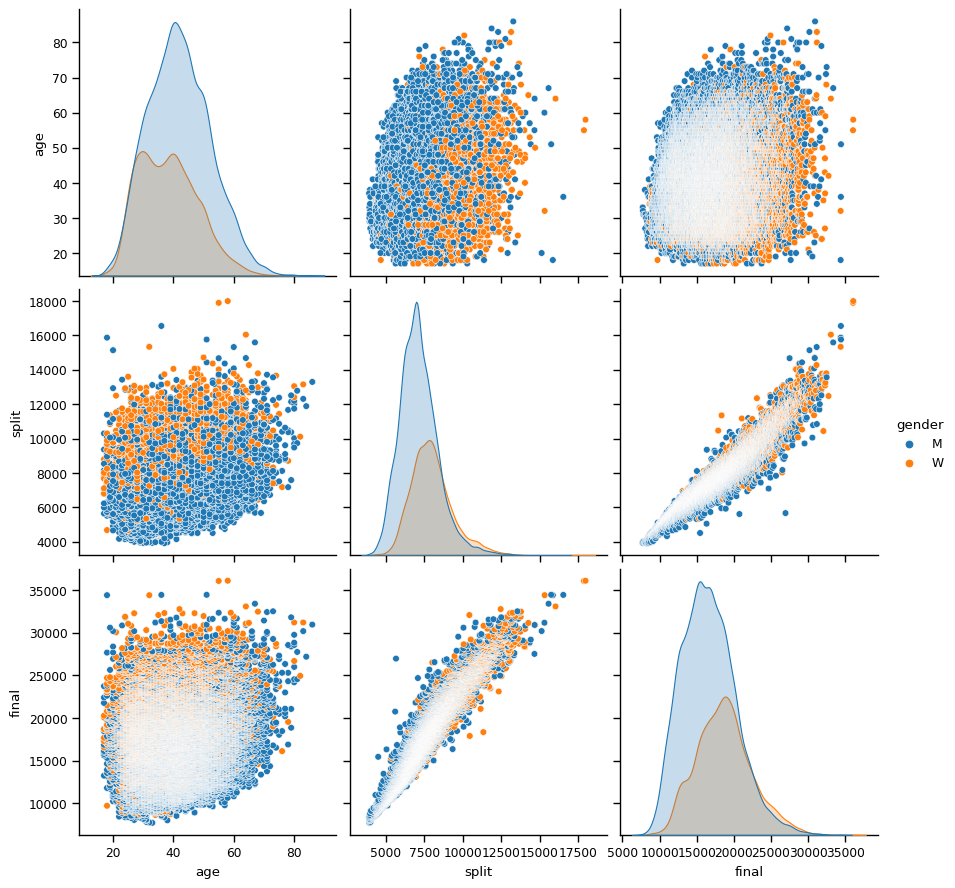

Корреляция 'final' и  split  =  0.96


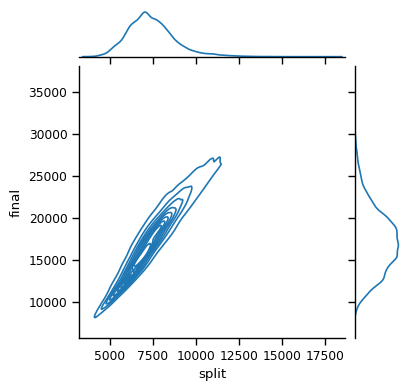

In [7]:
# data.head()

sns.pairplot(data, hue='gender', height=3)
plt.show()

n1 = 'split'
print ("Корреляция 'final' и ",n1," = ", round(stats.pearsonr(data[n1], data["final"])[0], 2))

sns.jointplot(x=n1, y="final", data=data, height=4, kind="kde")

plt.show()

In [8]:
# Матрица корреляции набора данных

data.corr()

,age,split,final
age,1.000000,0.163177,0.145993
split,0.163177,1.000000,0.955577
final,0.145993,0.955577,1.000000
